In [1]:
#import library for analysis
import pandas as pd
import numpy as np
from datetime import datetime
from sklearn.preprocessing import scale 
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [2]:
# Load the dataset
df = pd.read_csv('time_series_covid19_confirmed_global.csv')

In [3]:
df

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,271441,271448,271463,271469,271469,271477,271477,271490,271494,271496
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,47866,47875,47875,47875,47875,47875,47875,47875,47890,47890
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,105255,105277,105277,105277,105277,105277,105277,105277,105288,105288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,703228,703228,703228,703228,703228,703228,703228,703228,703228,703228
285,NaN,Winter Olympics 2022,39.904200,116.407400,0,0,0,0,0,0,...,535,535,535,535,535,535,535,535,535,535
286,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,11945,11945,11945,11945,11945,11945,11945,11945,11945,11945
287,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,343012,343012,343079,343079,343079,343135,343135,343135,343135,343135


In [4]:
df_drop= df.drop(columns=['Province/State','Lat','Long'], axis=1)

In [5]:
# Reshape the DataFrame from wide format to long format
df_long = df_drop.melt(id_vars=['Country/Region'], var_name='Date', value_name='Cases')

In [6]:
df_long

,Country/Region,Date,Cases
0,Afghanistan,1/22/20,0
1,Albania,1/22/20,0
2,Algeria,1/22/20,0
3,Andorra,1/22/20,0
4,Angola,1/22/20,0
...,...,...,...
330322,West Bank and Gaza,3/9/23,703228
330323,Winter Olympics 2022,3/9/23,535
330324,Yemen,3/9/23,11945
330325,Zambia,3/9/23,343135


In [7]:
# create new columns named Week with NaN value
df_long["Week"] = np.nan

In [8]:
df_long

,Country/Region,Date,Cases,Week
0,Afghanistan,1/22/20,0,NaN
1,Albania,1/22/20,0,NaN
2,Algeria,1/22/20,0,NaN
3,Andorra,1/22/20,0,NaN
4,Angola,1/22/20,0,NaN
...,...,...,...,...
330322,West Bank and Gaza,3/9/23,703228,NaN
330323,Winter Olympics 2022,3/9/23,535,NaN
330324,Yemen,3/9/23,11945,NaN
330325,Zambia,3/9/23,343135,NaN


In [9]:
# Convert the 'Date' column to datetime
df_long['Date'] = pd.to_datetime(df_long['Date'])

/var/folders/pn/c6579b9n0fl642p7j0vbphfc0000gn/T/ipykernel_1063/2367091610.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_long['Date'] = pd.to_datetime(df_long['Date'])


In [10]:
# Define a function to convert dates to week numbers
def get_week_number(date):
    return (date - start_date).days // 7 + 1

In [11]:
# Find the start date in the dataset 
start_date = df_long['Date'].min()

In [12]:
 # Add a new column for week number 
df_long['Week'] = df_long['Date'].apply(get_week_number)

In [13]:
df_long.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330327 entries, 0 to 330326
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Country/Region  330327 non-null  object        
 1   Date            330327 non-null  datetime64[ns]
 2   Cases           330327 non-null  int64         
 3   Week            330327 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 10.1+ MB


In [14]:
# show data and random check the week number if it is correct
df_long.head(14000)

,Country/Region,Date,Cases,Week
0,Afghanistan,2020-01-22,0,1
1,Albania,2020-01-22,0,1
2,Algeria,2020-01-22,0,1
3,Andorra,2020-01-22,0,1
4,Angola,2020-01-22,0,1
...,...,...,...,...
13995,France,2020-03-10,2,7
13996,France,2020-03-10,0,7
13997,France,2020-03-10,0,7
13998,France,2020-03-10,0,7


In [15]:
# drop Data column
df_long.drop(columns=['Date'],axis=1, inplace = True)


In [16]:
df_long

,Country/Region,Cases,Week
0,Afghanistan,0,1
1,Albania,0,1
2,Algeria,0,1
3,Andorra,0,1
4,Angola,0,1
...,...,...,...
330322,West Bank and Gaza,703228,164
330323,Winter Olympics 2022,535,164
330324,Yemen,11945,164
330325,Zambia,343135,164


Data Analysis: Identify the top 3 countries have highest covid infection from 22Jan2020 to 9Mar2023

In [17]:
# Sort() and groupby the countries with infection cases
top_infected_countries = df_long.groupby('Country/Region')['Cases'].max().sort_values(ascending=False)

# Identify the top 3 countries with the highest Covid infected cases
print("Top three countries with the highest infected cases:")
print(top_infected_countries.head(3))

Top three countries with the highest infected cases:
Country/Region
US        103802702
India      44690738
France     38618509
Name: Cases, dtype: int64


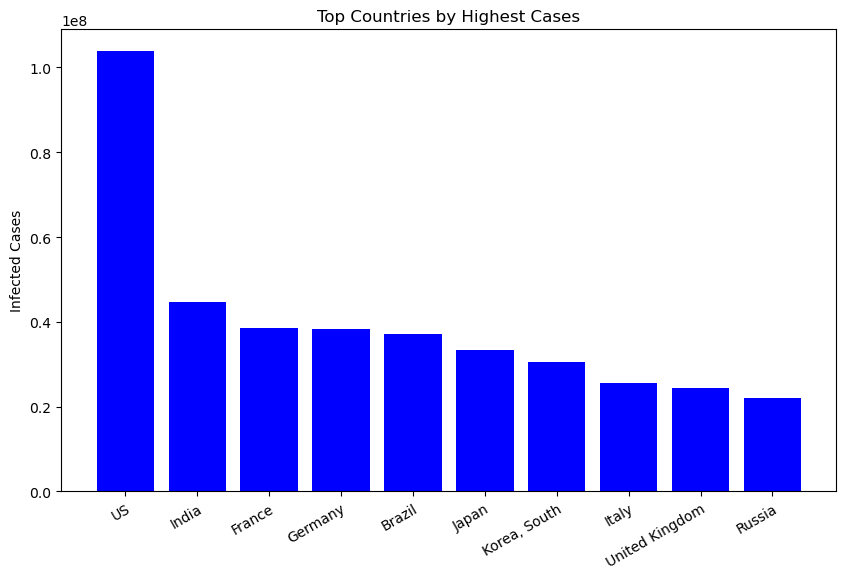

In [18]:
import matplotlib.pyplot as plt

# Get top 3 countries
top = top_infected_countries.head(10)

# Draw bar plot
fig, ax = plt.subplots(figsize=(10,6))
ax.bar(top.index, top, color='blue')

# Rotate labels 
plt.setp(ax.get_xticklabels(), rotation=30, ha="right",  
     rotation_mode="anchor")


# Add labels and title
ax.set_ylabel('Infected Cases')
ax.set_title('Top Countries by Highest Cases')

# Save figure
plt.savefig('top_infected_countries.png')

COUNTING WEEKY INFECTION 

It groups the data by Country/Region and Week
For each unique group, it finds the sum value (across all other columns)
This essentially aggregates/collapses the data, keeping only max value per group
reset_index() makes the group columns regular columns again
The output df_weekly will have unique combinations of Country/Region and Week as rows, with the sum values filled in for other columns across that group.

In [19]:
df_weekly = df_long.groupby(['Country/Region', 'Week']).sum().reset_index()

In [20]:
df_weekly

,Country/Region,Week,Cases
0,Afghanistan,1,0
1,Afghanistan,2,0
2,Afghanistan,3,0
3,Afghanistan,4,0
4,Afghanistan,5,10
...,...,...,...
32959,Zimbabwe,160,1841581
32960,Zimbabwe,161,1845494
32961,Zimbabwe,162,1847447
32962,Zimbabwe,163,1848889


In [21]:
# Calculate infected cases since previous week
df_weekly['Weekly_Infected'] = df_weekly['Cases'] - df_weekly['Cases'].shift(1)

# Fill NaN for first week  
df_weekly.loc[0,'Weekly_Infected'] = df_weekly.loc[0,'Cases']
# Replace negative values with 0
df_weekly['Weekly_Infected'] = np.maximum(df_weekly['Weekly_Infected'], 0)  

In [22]:
with pd.option_context('display.max_rows', None,):
   print(df_weekly)

                         Country/Region  Week      Cases  Weekly_Infected
0                           Afghanistan     1          0              0.0
1                           Afghanistan     2          0              0.0
2                           Afghanistan     3          0              0.0
3                           Afghanistan     4          0              0.0
4                           Afghanistan     5         10             10.0
5                           Afghanistan     6         35             25.0
6                           Afghanistan     7         47             12.0
7                           Afghanistan     8        118             71.0
8                           Afghanistan     9        216             98.0
9                           Afghanistan    10        745            529.0
10                          Afghanistan    11       1969           1224.0
11                          Afghanistan    12       3736           1767.0
12                          Afghanista

**Predictive Modeling:**
**Fit a linear regression model for each of the top infected countries.**

In [23]:
# Fit a linear regression model for each of the top three countries
top_countries = top_infected_countries.head(3).index
# Fit a linear regression model for each of the top three countries
models = {}
for country in top_countries:
    country_data = df_weekly[df_weekly['Country/Region'] == country]
    X = country_data['Week'].values.reshape(-1, 1)  # Months as numeric values
    y = country_data['Weekly_Infected'].values  # Distance values

    model = LinearRegression()
    model.fit(X, y)
    models[country] = model
    
# Output the models
for country, model in models.items():
    print(f"Model for {country}: Coefficients: {model.coef_}, Intercept: {model.intercept_}")

Model for US: Coefficients: [15006.39900018], Intercept: 3185243.7837049235
Model for India: Coefficients: [-9649.05801151], Intercept: 2703505.212778692
Model for France: Coefficients: [18183.62676261], Intercept: 209837.71891366178


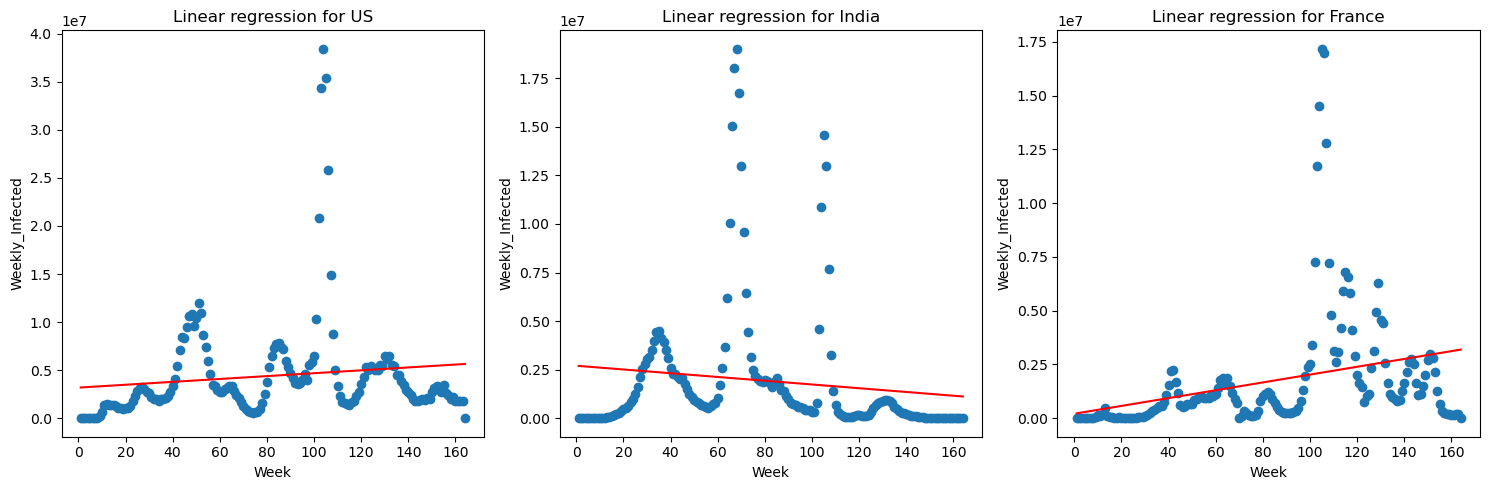

In [24]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 3, figsize=(15,5))

for i, (country, model) in enumerate(models.items()):

  country_data = df_weekly[df_weekly['Country/Region'] == country]  

  X = country_data['Week'].values.reshape(-1,1)
  y = country_data['Weekly_Infected'].values

  ax = axs[i]
  ax.scatter(X, y)

  y_pred = model.intercept_ + model.coef_[0]*X  
  ax.plot(X, y_pred, color='r')

  ax.set_title(f'Linear regression for {country}')
  ax.set_xlabel('Week')
  ax.set_ylabel('Weekly_Infected')

fig.tight_layout()
plt.savefig('top3_regressions.png')

In [25]:
# Select rows for US, India, France
df_filtered = df_weekly[(df_weekly['Country/Region'] == 'US') 
                        | (df_weekly['Country/Region'] == 'India')
                        | (df_weekly['Country/Region'] == 'France')]

# Groupby country and calculate variance  
variances = df_filtered.groupby('Country/Region')['Weekly_Infected'].var()
                       
# Sort in descending order   
variances = variances.sort_values(ascending=False)

# Print top results
print("Countries with highest variance:")  
print(variances)

Countries with highest variance:
Country/Region
US        3.102526e+13
India     1.202397e+13
France    7.842038e+12
Name: Weekly_Infected, dtype: float64


**Clustering:**
Perform K-Means clustering on the infected data to categorize countries into different infected groups.
Identify patterns and group characteristics.
Choose 1 country with highest variance for clustering

In [26]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

df_weekly

,Country/Region,Week,Cases,Weekly_Infected
0,Afghanistan,1,0,0.0
1,Afghanistan,2,0,0.0
2,Afghanistan,3,0,0.0
3,Afghanistan,4,0,0.0
4,Afghanistan,5,10,10.0
...,...,...,...,...
32959,Zimbabwe,160,1841581,5313.0
32960,Zimbabwe,161,1845494,3913.0
32961,Zimbabwe,162,1847447,1953.0
32962,Zimbabwe,163,1848889,1442.0


In [27]:
country_data = df_weekly[df_weekly['Country/Region'] == "US"]

In [28]:
country_data 

,Country/Region,Week,Cases,Weekly_Infected
30504,US,1,21,0.0
30505,US,2,58,37.0
30506,US,3,84,26.0
30507,US,4,97,13.0
30508,US,5,108,11.0
...,...,...,...,...
30663,US,160,719999991,1841091.0
30664,US,161,721846509,1846518.0
30665,US,162,723659953,1813444.0
30666,US,163,725416580,1756627.0


In [29]:
country_data  = country_data.drop(columns=['Country/Region','Weekly_Infected'])
country_data  = country_data.set_index('Week')
country_data 

,Cases
Week,
1,21
2,58
3,84
4,97
5,108
...,...
160,719999991
161,721846509
162,723659953


In [30]:
X = country_data.copy()

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/

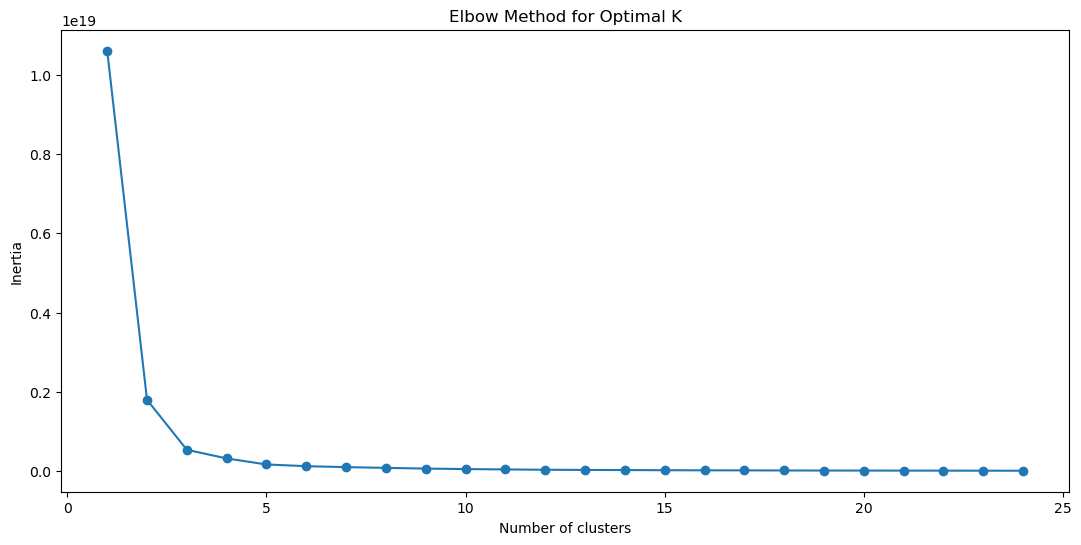

In [31]:
# Determine the optimal number of clusters using the Elbow method
inertia = []
for k in range(1, 25):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plotting the Elbow Method graph
plt.figure(figsize=(13, 6))
plt.plot(range(1, 25), inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [32]:
# Perform clustering on the scaled data
kmeans = KMeans(n_clusters=3, random_state=0)
clusters = kmeans.fit_predict(X)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [33]:
clusters

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2], dtype=int32)

In [34]:
X_scaled=scale(X)
X_scaled

array([[-1.29040349],
       [-1.29040334],
       [-1.29040324],
       [-1.29040319],
       [-1.29040314],
       [-1.29040264],
       [-1.29039245],
       [-1.29031574],
       [-1.28959093],
       [-1.28690554],
       [-1.28152162],
       [-1.27550261],
       [-1.26998829],
       [-1.26440028],
       [-1.25909161],
       [-1.25425868],
       [-1.24992988],
       [-1.2456645 ],
       [-1.24170746],
       [-1.23761194],
       [-1.23347363],
       [-1.22839   ],
       [-1.22118198],
       [-1.2118839 ],
       [-1.20084322],
       [-1.18842845],
       [-1.17581822],
       [-1.16394149],
       [-1.15310293],
       [-1.14261112],
       [-1.13409324],
       [-1.12605671],
       [-1.11834689],
       [-1.11134637],
       [-1.10340653],
       [-1.09533185],
       [-1.08713548],
       [-1.07783368],
       [-1.06695705],
       [-1.05389806],
       [-1.0378921 ],
       [-1.01652585],
       [-0.98850827],
       [-0.95545985],
       [-0.9227947 ],
       [-0

In [35]:
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled_df

,Cases
0,-1.290403
1,-1.290403
2,-1.290403
3,-1.290403
4,-1.290403
...,...
159,1.541074
160,1.548336
161,1.555468
162,1.562376


In [36]:
X_scaled_df['Cluster'] = clusters
X_scaled_df

,Cases,Cluster
0,-1.290403,0
1,-1.290403,0
2,-1.290403,0
3,-1.290403,0
4,-1.290403,0
...,...,...
159,1.541074,1
160,1.548336,1
161,1.555468,1
162,1.562376,1


In [37]:
country_data['Cluster'] = clusters
country_data

,Cases,Cluster
Week,,
1,21,0
2,58,0
3,84,0
4,97,0
5,108,0
...,...,...
160,719999991,1
161,721846509,1
162,723659953,1


In [38]:
kmeans.cluster_centers_

array([[3.66663913e+07],
       [6.32707157e+08],
       [2.59582137e+08]])

In [39]:
print(country_data.dtypes)

Cases      int64
Cluster    int32
dtype: object


In [40]:
country_data['Cluster'] = country_data['Cluster'].astype('category')

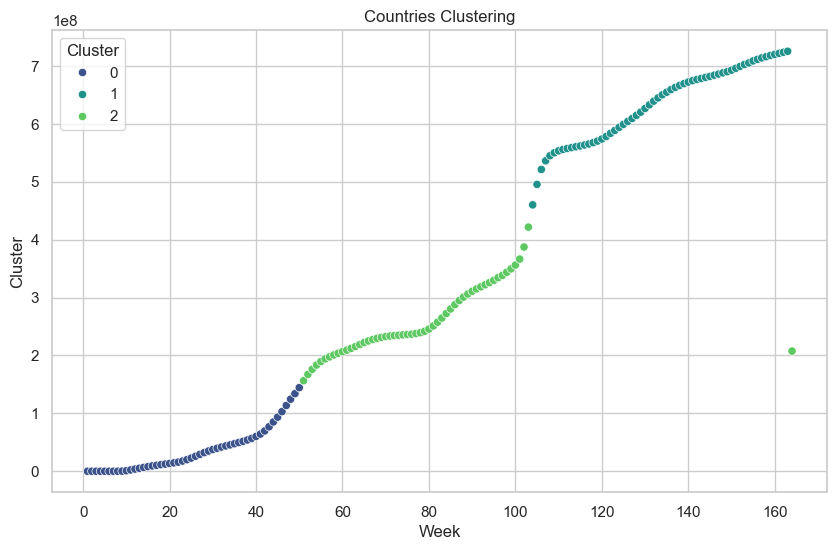

In [41]:
sns.set(style="whitegrid")

# Create a scatter plot
plt.figure(figsize=(10, 6))
#sns.scatterplot(data=X_scaled_df, x='Distance', y='Cluster', hue='Cluster', palette='viridis', legend=False)
#g = sns.scatterplot(data=swimmer_data, x=swimmer_data.index, y='Distance', hue='Cluster',palette='viridis', legend=True)
g = sns.scatterplot(data=country_data, x='Week', y='Cases', hue='Cluster', palette='viridis', legend=True)

#sns.xticks(range(len(X_scaled_df))) 
#g.set_xticks(range(len(X_scaled_df)))

# Set plot labels and title
#plt.xlabel('Week')
plt.ylabel('Cluster')
plt.title('Countries Clustering')

# Show the plot
plt.show()

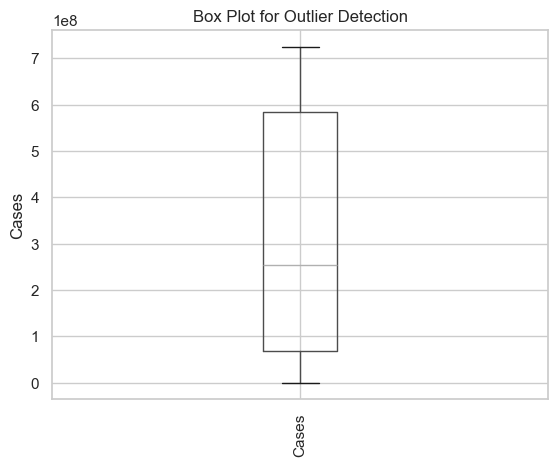

In [42]:
# Box plot for outlier detection
X.boxplot()
plt.title('Box Plot for Outlier Detection')
plt.ylabel('Cases')
plt.xticks(rotation=90)
plt.show()

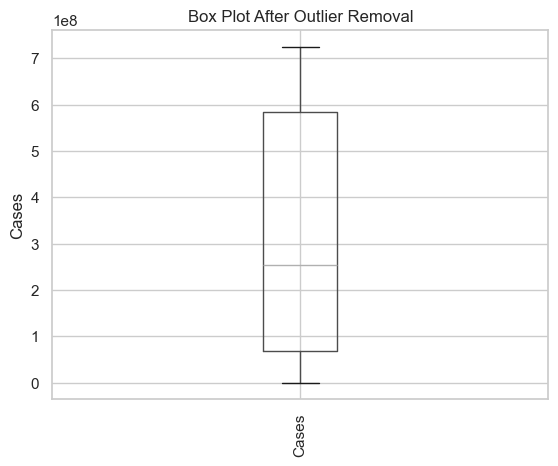

In [43]:
# Identify outliers using IQR
Q1 = X.quantile(0.25)
Q3 = X.quantile(0.75)
IQR = Q3 - Q1

# Calculate the bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
X_filtered = X[~((X < lower_bound) | (X > upper_bound)).any(axis=1)]

# Box plot after outlier removal
X_filtered.boxplot()
plt.title('Box Plot After Outlier Removal')
plt.ylabel('Cases')
plt.xticks(rotation=90)
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/

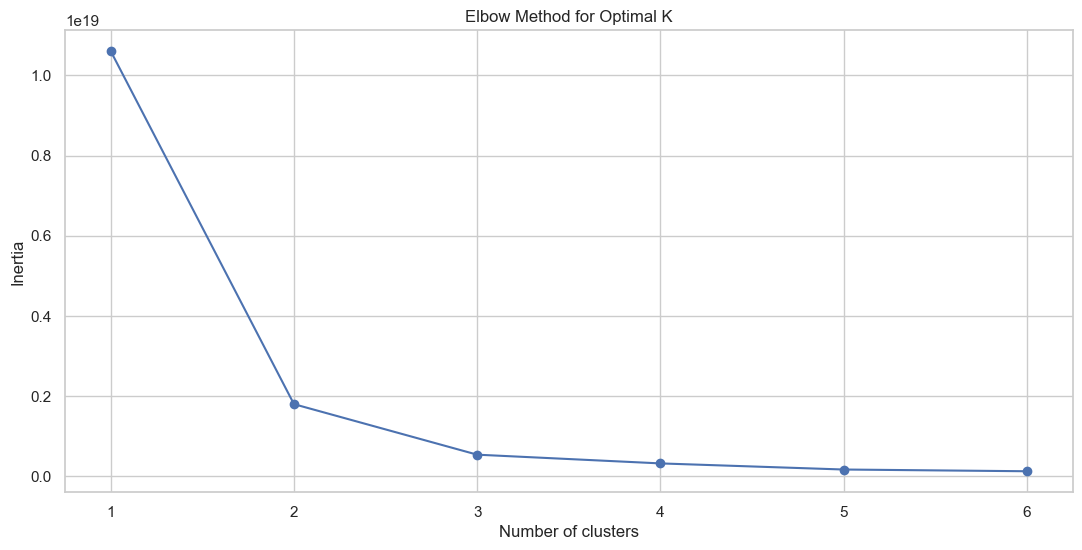

In [44]:
# Determine the optimal number of clusters using the Elbow method again without outliers
inertia = []
for k in range(1, 7):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_filtered)
    inertia.append(kmeans.inertia_)

# Plotting the Elbow Method graph
plt.figure(figsize=(13, 6))
plt.plot(range(1, 7), inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [45]:
import seaborn as sns
from sklearn.cluster import KMeans

# Filter the DataFrame for the specific countries with highest variance
selected_counrties = ['US']
df_filtered = df_weekly[df_weekly['Country/Region'].isin(selected_counrties)]

df_filtered


,Country/Region,Week,Cases,Weekly_Infected
30504,US,1,21,0.0
30505,US,2,58,37.0
30506,US,3,84,26.0
30507,US,4,97,13.0
30508,US,5,108,11.0
...,...,...,...,...
30663,US,160,719999991,1841091.0
30664,US,161,721846509,1846518.0
30665,US,162,723659953,1813444.0
30666,US,163,725416580,1756627.0


In [46]:
# Prepare data for clustering (pivot the DataFrame to have selected country as columns and week as rows)
X_selected = df_filtered.pivot(index='Week', columns='Country/Region', values='Cases').fillna(0)

X_selected

Country/Region,US
Week,
1,21
2,58
3,84
4,97
5,108
...,...
160,719999991
161,721846509
162,723659953


In [47]:
# Perform K-Means clustering with optimal k = 3
kmeans_selected = KMeans(n_clusters=3, random_state=0)
clusters_selected = kmeans_selected.fit_predict(X_selected)

clusters_selected

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2], dtype=int32)

In [48]:
# Add the cluster information to the DataFrame
X_selected_clustered = X_selected.copy()
X_selected_clustered['Cluster'] = clusters_selected

# Melt the DataFrame for visualization
X_selected_melted = X_selected_clustered.reset_index().melt(id_vars=['Week', 'Cluster'], var_name='Country/Region', value_name='Cases')

X_selected_melted

,Week,Cluster,Country/Region,Cases
0,1,0,US,21
1,2,0,US,58
2,3,0,US,84
3,4,0,US,97
4,5,0,US,108
...,...,...,...,...
159,160,1,US,719999991
160,161,1,US,721846509
161,162,1,US,723659953
162,163,1,US,725416580


<Axes: xlabel='Week', ylabel='Cases'>

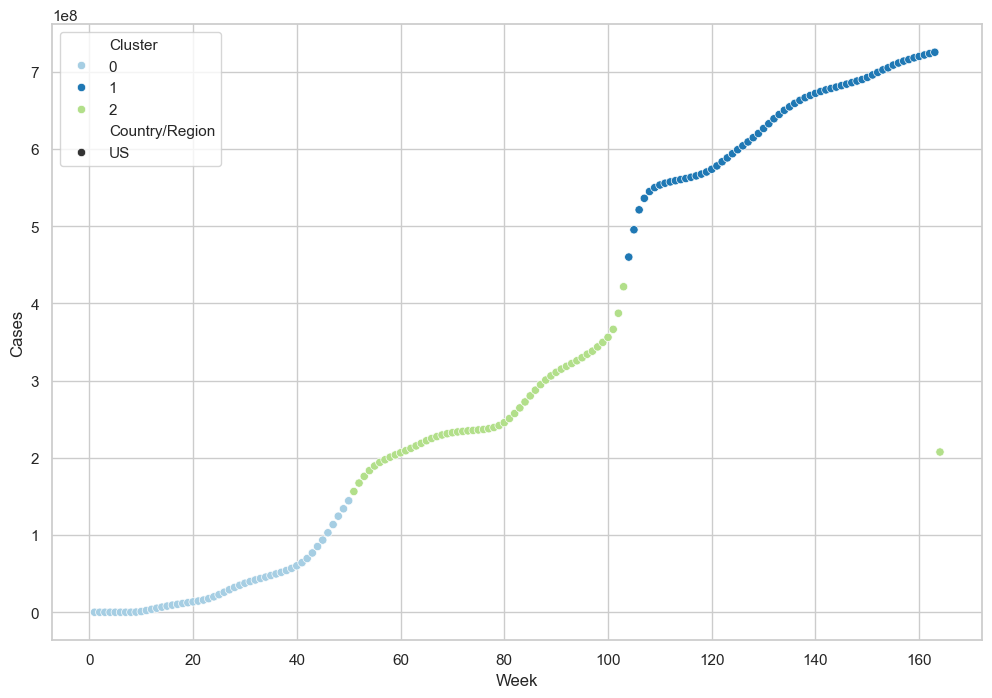

In [49]:
# Visualization using seaborn's scatterplot
plt.figure(figsize=(12, 8))
sns.scatterplot(data=X_selected_melted, x='Week', y='Cases', hue='Cluster', palette='Paired', style='Country/Region')


In [50]:
from sklearn.metrics import silhouette_score

# Calculate the silhouette score using the data used for clustering and the cluster labels
score = silhouette_score(X_selected, clusters_selected)
print('Silhouette Score:', score)

Silhouette Score: 0.7441992628931933


## Graphic Analysis

In [51]:
import networkx as nx #for Graph Analytics

In [52]:
df_weekly['Country/Region'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antarctica', 'Antigua and Barbuda', 'Argentina', 'Armenia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana',
       'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Grenada', 'Gua

In [82]:
list_countries = ['US','Canada','Cuba','Mexico','Dominican Republic','Haiti','Bahamas']

In [83]:
df_graph = df_weekly[(df_weekly['Country/Region'].isin(list_countries))]

/var/folders/pn/c6579b9n0fl642p7j0vbphfc0000gn/T/ipykernel_1063/967221739.py:11: RuntimeWarning: invalid value encountered in scalar divide
  if abs(df_graph.iloc[i]['Weekly_Infected'] - df_graph.iloc[j]['Weekly_Infected']) / df_graph.iloc[i]['Weekly_Infected'] < 0.05:
/var/folders/pn/c6579b9n0fl642p7j0vbphfc0000gn/T/ipykernel_1063/967221739.py:11: RuntimeWarning: divide by zero encountered in scalar divide
  if abs(df_graph.iloc[i]['Weekly_Infected'] - df_graph.iloc[j]['Weekly_Infected']) / df_graph.iloc[i]['Weekly_Infected'] < 0.05:


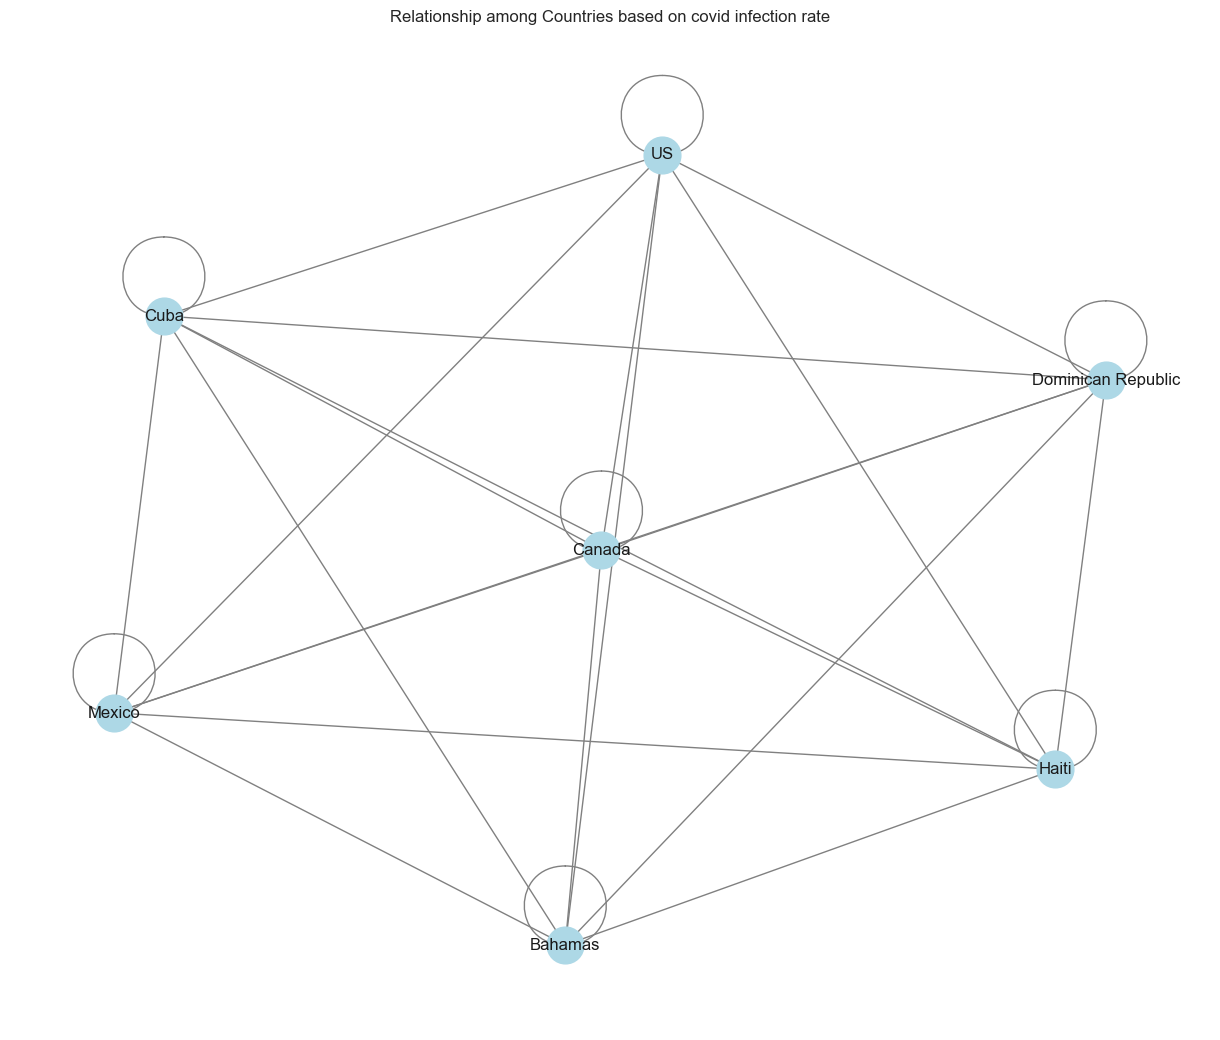

<Figure size 640x480 with 0 Axes>

In [92]:
# Create a graph
G = nx.Graph()

# Add nodes (each swimmer is a node)
for countries in df_graph['Country/Region']:
    G.add_node(countries)

# Add edges (assuming a relationship if total weekly cases are within 5% of each other)
for i in range(len(df_graph)):
    for j in range(i+1, len(df_graph)):
        if abs(df_graph.iloc[i]['Weekly_Infected'] - df_graph.iloc[j]['Weekly_Infected']) / df_graph.iloc[i]['Weekly_Infected'] < 0.05:
            G.add_edge(df_graph.iloc[i]['Country/Region'], df_graph.iloc[j]['Country/Region'])

# Draw the graph
plt.figure(figsize=(12, 10))
pos = nx.spring_layout(G)  # Positions for all nodes
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=700)
plt.title('Relationship among Countries based on covid infection rate')
plt.show()

plt.savefig("graph.png")

In [85]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Create a graph
G = nx.Graph()

# Add nodes (each swimmer is a node)
for countries in df_graph['Country/Region']:
    G.add_node(countries)

# Add edges (assuming a relationship if total weekly cases are within 2% of each other)
for i in range(len(df_graph)):
    for j in range(i+1, len(df_graph)):
        if abs(df_graph.iloc[i]['Weekly_Infected'] - df_graph.iloc[j]['Weekly_Infected']) / df_graph.iloc[i]['Weekly_Infected'] < 0.02:
            G.add_edge(df_graph.iloc[i]['Country/Region'], df_graph.iloc[j]['Country/Region'])



/var/folders/pn/c6579b9n0fl642p7j0vbphfc0000gn/T/ipykernel_1063/1912897329.py:15: RuntimeWarning: invalid value encountered in scalar divide
  if abs(df_graph.iloc[i]['Weekly_Infected'] - df_graph.iloc[j]['Weekly_Infected']) / df_graph.iloc[i]['Weekly_Infected'] < 0.02:
/var/folders/pn/c6579b9n0fl642p7j0vbphfc0000gn/T/ipykernel_1063/1912897329.py:15: RuntimeWarning: divide by zero encountered in scalar divide
  if abs(df_graph.iloc[i]['Weekly_Infected'] - df_graph.iloc[j]['Weekly_Infected']) / df_graph.iloc[i]['Weekly_Infected'] < 0.02:


In [86]:
# Step 2: Define a function to draw the graph with centrality as node size
def draw_graph_with_centrality(G, centrality, title):
    # Normalize the centrality values to be between 0 and 1000 for node size
    centrality_values = [v * 1000 for v in centrality.values()]
    
    # Draw the graph
    plt.figure(figsize=(8, 6))
    nx.draw(G, with_labels=True, node_size=centrality_values, 
            node_color=np.random.rand(len(G), 3), # Random colours
            cmap=plt.cm.Blues, font_weight='bold')
    plt.title(title)
    plt.show()

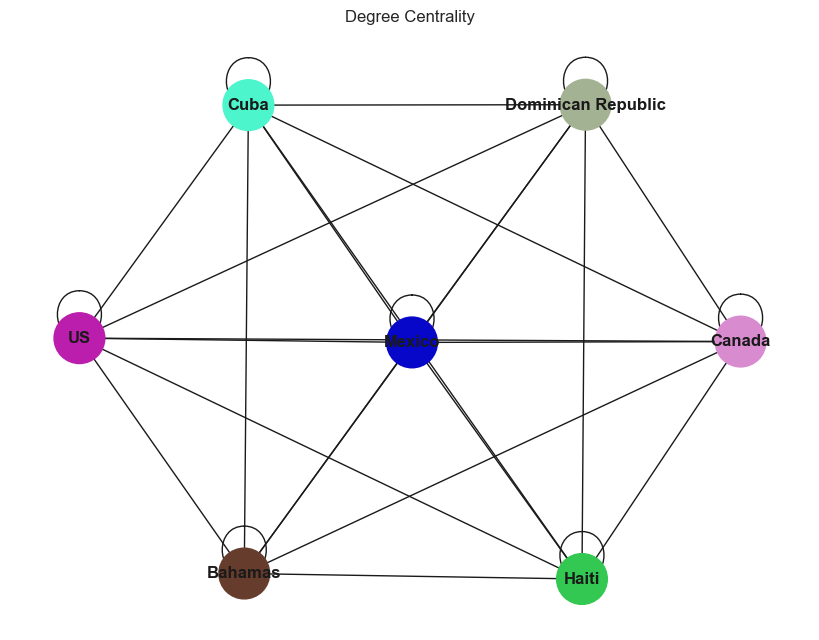

In [87]:
# Step 3: Calculate and visualize each centrality measure
# Degree Centrality
degree_centrality = nx.degree_centrality(G)
draw_graph_with_centrality(G, degree_centrality, "Degree Centrality")


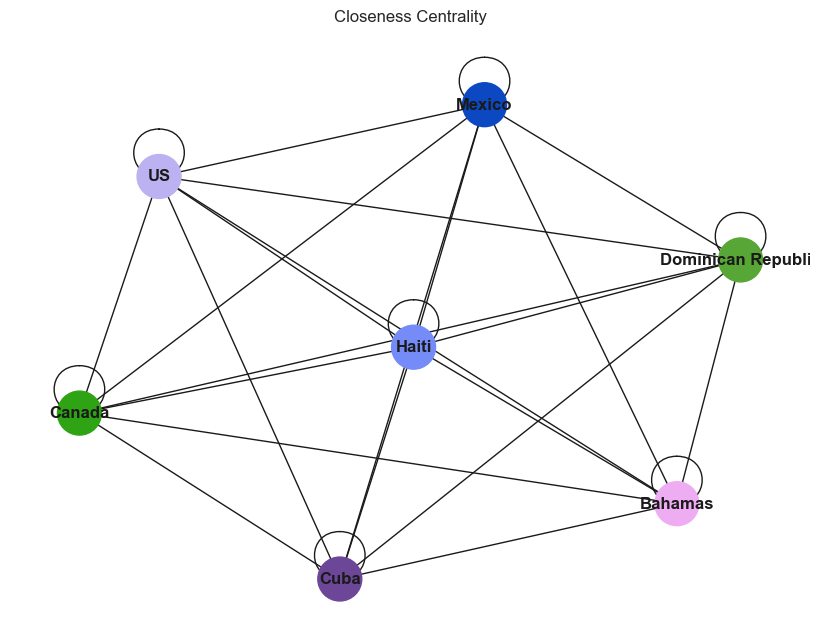

In [89]:
# Closeness Centrality
closeness_centrality = nx.closeness_centrality(G)
draw_graph_with_centrality(G, closeness_centrality, "Closeness Centrality")


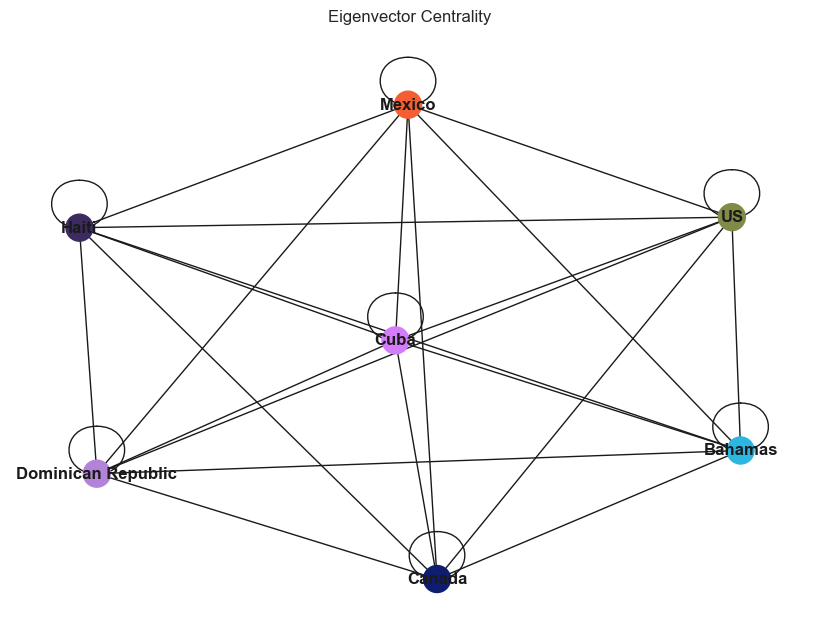

In [90]:
# Eigenvector Centrality
eigenvector_centrality = nx.eigenvector_centrality(G)
draw_graph_with_centrality(G, eigenvector_centrality, "Eigenvector Centrality")